In [13]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import torch.optim as optim
import torch

Pre-Processing

independent feature x
dependent feature y

scale tenor x by a factor of .1

In [14]:
x = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]      # Y
y = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]  # X

t_c = torch.tensor(y)
t_u = torch.tensor(x)

t_un = 0.1 * t_u

Training and Validation Set

In [15]:
samples = t_u.shape[0]
values = int(0.2 * samples)

shuffle = torch.randperm(samples)
train_idx = shuffle[:-values]
val_idx = shuffle[-values:]

t_u_train = t_u[train_idx]
t_u_val = t_u[val_idx]

t_un_train = t_un[train_idx]
t_un_val = t_un[val_idx]

t_c_train = t_c[train_idx]
t_c_val = t_c[val_idx]


Define Cost Function and Learning Rates


In [16]:
def cost(t_p, t_c):
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

learning_rates = [1e-1, 1e-2, 1e-3, 1e-4]


Linear Regression Training


In [17]:
def lin_model(t_u, w, b):
  return w*t_u + b

def lin_training(epochs, optimizer, params, t_u_train, t_u_val, t_c_train, t_c_val):
  for epoch in range(1, epochs+1):
    t_p_train = lin_model(t_u_train, *params)
    train_loss = cost(t_p_train, t_c_train)

    t_p_val = lin_model(t_u_val, *params)
    val_loss = cost(t_p_val, t_c_val)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {val_loss:.6f}')
  print('')
  return params


Non-linear Regression Training

In [18]:
def nonlin_model(t_u, w2, w1, b):
  return w2*t_u**2 + w1*t_u + b

def nonlin_training(epochs, optimizer, params, t_u_train, t_u_val, t_c_train, t_c_val):
  for epoch in range(1, epochs+1):
    t_p_train = nonlin_model(t_u_train, *params)
    train_loss = cost(t_p_train, t_c_train)

    t_p_val = nonlin_model(t_u_val, *params)
    val_loss = cost(t_p_val, t_c_val)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:}, \tValidation Loss: {val_loss}')
  print('')
  return params

SGD Optimized Non-linear Model

In [19]:
print("### SGD Optimized Non-linear Model")
for lr in learning_rates:
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=lr)
    print(f'Learning rate of {lr}')
    nonlin_training(5000, optimizer, params, t_un_train, t_un_val, t_c_train, t_c_val)


### SGD Optimized Non-linear Model
Learning rate of 0.1
Epochs: 500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 1000, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 1500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 2000, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 2500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 3000, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 3500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 4000, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 4500, 	Training Loss: nan, 	Validation Loss: nan
Epochs: 5000, 	Training Loss: nan, 	Validation Loss: nan

Learning rate of 0.01
Epochs: 500, 	Training Loss: 7.638662338256836, 	Validation Loss: 8.306347846984863
Epochs: 1000, 	Training Loss: 7.071401596069336, 	Validation Loss: 11.21963882446289
Epochs: 1500, 	Training Loss: 6.996914386749268, 	Validation Loss: 12.401638984680176
Epochs: 2000, 	Training Loss: 6.9870710372924805, 	Validation Loss: 12.84788703918457
Epochs: 250

Adam Optimized Non-linear Model

In [20]:
print("### Adam Optimized Non-linear Model")
for lr in learning_rates:
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.Adam([params], lr=lr)
    print(f'Learning rate of {lr}')
    nonlin_training(5000, optimizer, params, t_u_train, t_u_val, t_c_train, t_c_val)

### Adam Optimized Non-linear Model
Learning rate of 0.1
Epochs: 500, 	Training Loss: 69.02802276611328, 	Validation Loss: 139.14422607421875
Epochs: 1000, 	Training Loss: 16.44988250732422, 	Validation Loss: 43.947486877441406
Epochs: 1500, 	Training Loss: 7.589202880859375, 	Validation Loss: 18.586830139160156
Epochs: 2000, 	Training Loss: 6.998510360717773, 	Validation Loss: 13.811492919921875
Epochs: 2500, 	Training Loss: 6.985647678375244, 	Validation Loss: 13.157831192016602
Epochs: 3000, 	Training Loss: 6.985574245452881, 	Validation Loss: 13.10836124420166
Epochs: 3500, 	Training Loss: 6.985571384429932, 	Validation Loss: 13.10710334777832
Epochs: 4000, 	Training Loss: 6.985572338104248, 	Validation Loss: 13.10702896118164
Epochs: 4500, 	Training Loss: 6.9855780601501465, 	Validation Loss: 13.106964111328125
Epochs: 5000, 	Training Loss: 6.985567092895508, 	Validation Loss: 13.106913566589355

Learning rate of 0.01
Epochs: 500, 	Training Loss: 867.5861206054688, 	Validation Los

Plotting SGD Optimized Linear vs Nonlinear Models

Epochs: 500, 	Training Loss: 200.548218, 	Validation Loss: 281.670166
Epochs: 1000, 	Training Loss: 97.646034, 	Validation Loss: 138.944290
Epochs: 1500, 	Training Loss: 50.593586, 	Validation Loss: 71.273857
Epochs: 2000, 	Training Loss: 29.078827, 	Validation Loss: 38.702946
Epochs: 2500, 	Training Loss: 19.241095, 	Validation Loss: 22.708477
Epochs: 3000, 	Training Loss: 14.742745, 	Validation Loss: 14.650273
Epochs: 3500, 	Training Loss: 12.685841, 	Validation Loss: 10.462038
Epochs: 4000, 	Training Loss: 11.745338, 	Validation Loss: 8.206483
Epochs: 4500, 	Training Loss: 11.315288, 	Validation Loss: 6.944878
Epochs: 5000, 	Training Loss: 11.118647, 	Validation Loss: 6.212310

Epochs: 500, 	Training Loss: 7.638662338256836, 	Validation Loss: 8.306347846984863
Epochs: 1000, 	Training Loss: 7.071401596069336, 	Validation Loss: 11.21963882446289
Epochs: 1500, 	Training Loss: 6.996914386749268, 	Validation Loss: 12.401638984680176
Epochs: 2000, 	Training Loss: 6.9870710372924805, 	Vali

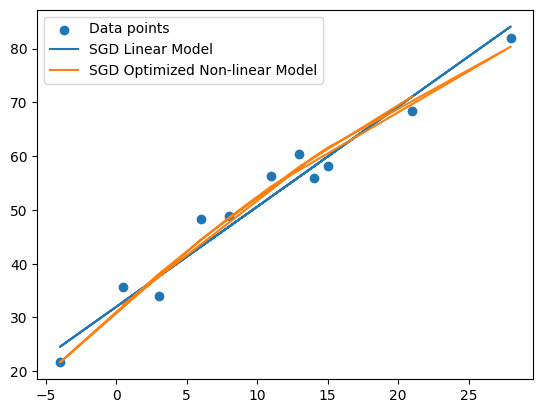

In [21]:
lin_params = torch.tensor([1.0, 0.0], requires_grad=True)
nonlin_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

lin_optimizer = optim.SGD([lin_params], lr = 1e-3)
SGD = optim.SGD([nonlin_params], lr = 1e-2)

lin = lin_training(5000, lin_optimizer, lin_params, t_u_train, t_u_val, t_c_train, t_c_val)
nonlin_SGD = nonlin_training(5000, SGD, nonlin_params, t_un_train, t_un_val, t_c_train, t_c_val)

t_p_lin = lin_model(t_u, *lin).detach().numpy()
t_p_nonSGD = nonlin_model(t_un, *nonlin_SGD).detach().numpy()

plt.scatter(t_u, t_c, label = 'Data points')
plt.plot(t_u, t_p_lin, label = 'SGD Linear Model')
plt.plot(t_u, t_p_nonSGD, label = 'SGD Optimized Non-linear Model')

plt.legend()
plt.show()

Determining the better model


### Selecting the Best Non-linear Model (Using Adam Optimizer)

Learning rate of 0.1
Epoch 500, Training Loss: 69.028023, Validation Loss: 139.144226
Epoch 1000, Training Loss: 16.449883, Validation Loss: 43.947487
Epoch 1500, Training Loss: 7.589203, Validation Loss: 18.586830
Epoch 2000, Training Loss: 6.998510, Validation Loss: 13.811493
Epoch 2500, Training Loss: 6.985648, Validation Loss: 13.157831
Epoch 3000, Training Loss: 6.985574, Validation Loss: 13.108361
Epoch 3500, Training Loss: 6.985571, Validation Loss: 13.107103
Epoch 4000, Training Loss: 6.985572, Validation Loss: 13.107029
Epoch 4500, Training Loss: 6.985578, Validation Loss: 13.106964
Epoch 5000, Training Loss: 6.985567, Validation Loss: 13.106914
Final Training Loss: 6.985567, Final Validation Loss: 13.106914

Learning rate of 0.01
Epoch 500, Training Loss: 867.586121, Validation Loss: 882.817261
Epoch 1000, Training Loss: 599.059814, Validation Loss: 649.367371
Epoch 1500, Training Loss: 371.895142, Validation Lo

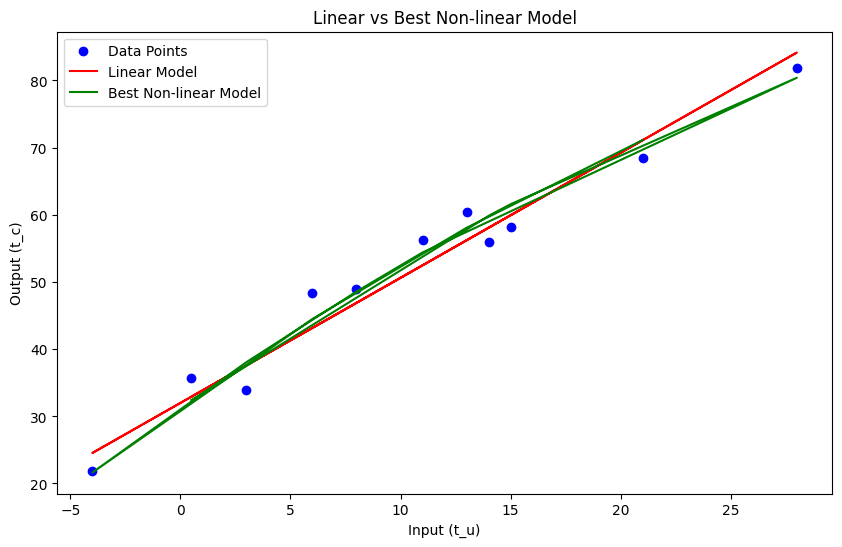


### Conclusion
Linear Model Validation Loss: 6.212310
Best Non-linear Model Validation Loss: 13.106914
The linear model performs better than the non-linear model.


In [22]:
# Initialize variables to track the best non-linear model
best_nonlin_params = None
best_nonlin_val_loss = float('inf')
best_nonlin_train_loss = None
best_nonlin_lr = None

# Use the Adam optimizer for the non-linear model
print("\n### Selecting the Best Non-linear Model (Using Adam Optimizer)")
for lr in learning_rates:
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.Adam([params], lr=lr)
    print(f'\nLearning rate of {lr}')
    # Train the non-linear model
    for epoch in range(1, 5001):
        t_p_train = nonlin_model(t_u_train, *params)
        train_loss = cost(t_p_train, t_c_train)
        t_p_val = nonlin_model(t_u_val, *params)
        val_loss = cost(t_p_val, t_c_val)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print(f'Epoch {epoch}, Training Loss: {train_loss.item():.6f}, Validation Loss: {val_loss.item():.6f}')
    print(f'Final Training Loss: {train_loss.item():.6f}, Final Validation Loss: {val_loss.item():.6f}')
    # Update best model if current model has lower validation loss
    if val_loss.item() < best_nonlin_val_loss:
        best_nonlin_val_loss = val_loss.item()
        best_nonlin_train_loss = train_loss.item()
        best_nonlin_params = params.detach().clone()
        best_nonlin_lr = lr

print(f'\nBest Non-linear Model Learning Rate: {best_nonlin_lr}')
print(f'Best Non-linear Model Validation Loss: {best_nonlin_val_loss:.6f}')

# Re-initialize parameters for the linear model
params_lin = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer_lin = optim.SGD([params_lin], lr=1e-3)
print("\n### Training the Linear Model")
# Train the linear model
for epoch in range(1, 5001):
    t_p_train = lin_model(t_u_train, *params_lin)
    train_loss_lin = cost(t_p_train, t_c_train)
    t_p_val = lin_model(t_u_val, *params_lin)
    val_loss_lin = cost(t_p_val, t_c_val)
    optimizer_lin.zero_grad()
    train_loss_lin.backward()
    optimizer_lin.step()
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Training Loss: {train_loss_lin.item():.6f}, Validation Loss: {val_loss_lin.item():.6f}')
print(f'Final Training Loss: {train_loss_lin.item():.6f}, Final Validation Loss: {val_loss_lin.item():.6f}')

# --- Comparing and Visualizing the Models ---

# Generate predictions using the best non-linear model and linear model
t_p_lin = lin_model(t_u, *params_lin).detach().numpy()
t_p_nonlin = nonlin_model(t_u, *best_nonlin_params).detach().numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(t_u.numpy(), t_c.numpy(), label='Data Points', color='blue')
plt.plot(t_u.numpy(), t_p_lin, label='Linear Model', color='red')
plt.plot(t_u.numpy(), t_p_nonlin, label='Best Non-linear Model', color='green')
plt.xlabel('Input (t_u)')
plt.ylabel('Output (t_c)')
plt.title('Linear vs Best Non-linear Model')
plt.legend()
plt.show()

# --- Conclusion ---

print("\n### Conclusion")
print(f'Linear Model Validation Loss: {val_loss_lin.item():.6f}')
print(f'Best Non-linear Model Validation Loss: {best_nonlin_val_loss:.6f}')
if best_nonlin_val_loss < val_loss_lin.item():
    print("The non-linear model performs better than the linear model.")
else:
    print("The linear model performs better than the non-linear model.")
